In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
#Read the data
DFA = pd.read_csv("Bank_Personal_Loan_Model.csv")


In [2]:
#Display the Data
DFA

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
# X_df is the input and Y_df is the output
X_df = DFA.loc[:, DFA.columns != 'CreditCard']
Y_df = DFA.loc[:, DFA.columns == 'CreditCard']

In [4]:
#Importing libraries and classees
from sklearn.model_selection import train_test_split
#Dividing the data in 7:3 ratio for traning and testing respectively
x_train,x_test,y_train,y_test=train_test_split(X_df,Y_df,test_size=0.3,random_state=114)

In [5]:
#Importing libraries and classes
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier( criterion='entropy',
    splitter='best',
    max_depth=3,
    random_state=114)#gini for information gain

In [6]:
#Display X training
print(x_train.shape)

(3500, 13)


In [7]:
#Display Y training
print(y_train.shape)

(3500, 1)


In [8]:
#Display X testing
print(x_test.shape)

(1500, 13)


In [9]:
#Dispaly Y testing
print(y_test.shape)

(1500, 1)


In [10]:
#Training the Model
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=114)

In [11]:
#Accuracy of the model in Testing
model.score(x_train,y_train)

0.7462857142857143

In [12]:
#y_test contains all the outputs and x_test contains all the inputs.Test the machine if it gives the expected output for the
#Correspong inputs.
expected=y_test
predicted=model.predict(x_test)

In [13]:
#Importing Libraries and Classes
from sklearn import metrics 

In [14]:
#Printing the report
print(metrics.accuracy_score(expected,predicted))

0.742


In [15]:
#Output in the form of count
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1059
           1       0.91      0.14      0.24       441

    accuracy                           0.74      1500
   macro avg       0.82      0.57      0.54      1500
weighted avg       0.79      0.74      0.67      1500



In [16]:
#Display in matrix format
print(metrics.confusion_matrix(expected,predicted))

[[1053    6]
 [ 381   60]]


In [17]:
from sklearn.tree import export_graphviz

In [18]:
from io import StringIO

In [24]:
from IPython.display import Image

In [25]:
import pydotplus

In [20]:
dot_data=StringIO()

In [21]:
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,special_characters=True)

In [26]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

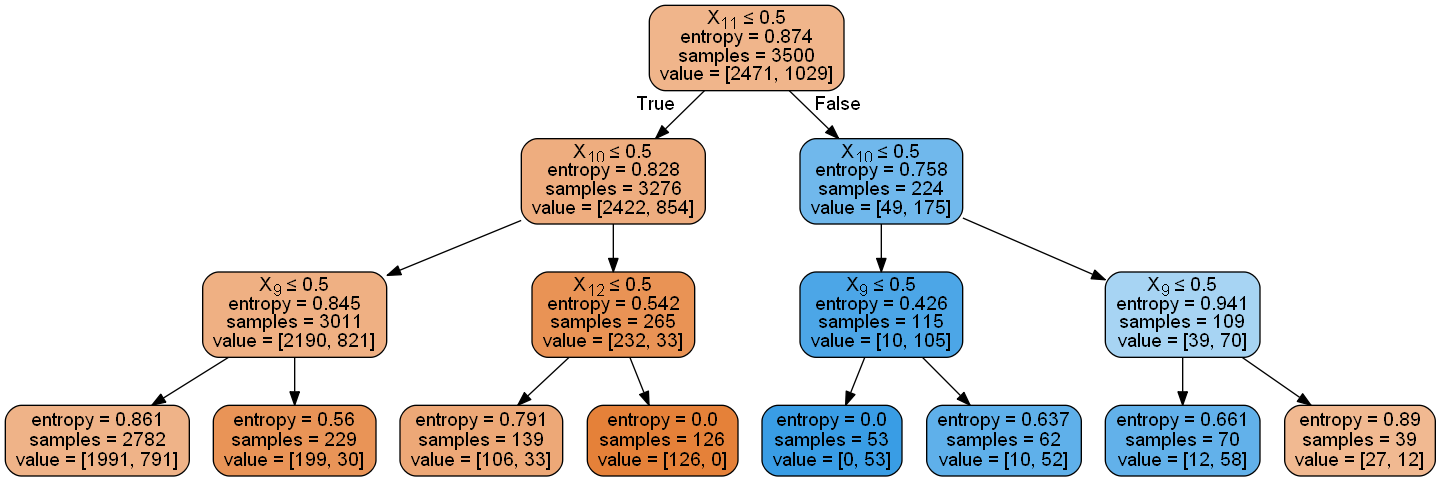

In [27]:
Image(graph.create_png())

In [29]:
graph.write_png("decisiontree.png")

True